___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="300px" height="100px" />


# Proyecto Final

En el proyecto final diseñarás un portafolio de inversión utilizando activos (o ETFs) reales de tu preferencia. Utilizarás todas las herramientas vistas a lo largo del curso para este fin, y después, evaluarás qué tan buena hubiera sido tu inversión de haber invertido en este portafolio.

El proyecto se realizará en equipos de mínimo dos (2) y máximo tres (3) personas. Ni más, ni menos. Para esto, deberán conformar los equipos en este momento, y designar a un miembro del equipo que me envíe un correo con los nombres de los integrantes.
___

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.optimize import minimize 

### Definición de Funciones

In [2]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
varianza = lambda w, Sigma: w.T.dot(Sigma).dot(w)
Sharpe = lambda er, s, rf: (er-rf)/s
rendimiento = lambda w, r: w.dot(r)
rs = lambda w,Eind,rf,Sigma: -(rendimiento(w,Eind)-rf)/ varianza(w,Sigma)**0.5

def port_emv(Eind, rf, Sigma):
    n = len(Eind)
    w0 = np.ones(n)/n
    bnds =((0,None),)*n
    cons = {'type':'eq','fun':lambda w: w.sum()-1}
    emv = minimize(fun = rs, x0=w0, args = (Eind,rf,Sigma,),
                 bounds = bnds, constraints = cons, tol = 1e-10)
    return emv.x
    

def port_efi(Eind,rf,Sigma, gamma):
    w_emv = port_emv(Eind, rf, Sigma)
 
    e_emv = Eind.dot(w_emv)
    s_emv = (w_emv.T.dot(Sigma).dot(w_emv))**0.5
    
    w_opt = (e_emv -rf)/(gamma*s_emv**2)
    sal = pd.DataFrame(index =Eind_2015.index, columns = ['Weights (%)'], data = w_opt*w_emv*100)
    sal = sal.append(pd.Series((1- w_opt)*100 ,index =['Weights (%)'], name = 'rf'))
    return sal.round(2)

## 1. Elección de activos 

Nosotros consideramos el tercer caso para la elección de los activos que compondran nuestro portafolio haciendo una mezcla de tanto activos que pertenecen a la bolsa de valores de los Estados Unidos como la incorporación de ETF que repliquen los indices de los mercados de distintos paises o regiones alrededor del mundo y que diversifiquen el portafolio, tomando en consideración las ideas propuestas por Malkiel en su libro a Random Walk Down Wall Street así como de otros autores en donde se puede alcanzar una mayor diversificación utilizando una exposición a diversos mercados del mundo. Además para fines prácticos se escogieron los ETF que se comportan similar a los indices para fines prácticos considerando el tiempo y la gran variedad de compañias alrededor del mundo.

El criterio para la selección de los stocks pertenecientes al NYC es considerar los grupos industriales considerados dentro del SP500 dentro de la clasificación *"Global Industry Classification Standard"* creada también por la compañia de Standard & Poor's.

|GICS Sector|Code|Number of companies
:----|----|----
Energy|10|21
Materials|15|28
Industrials |20|74
Consumer Discretionary|25|63
Consumer Staples| 30|32
Health Care|35|64
Financials|40|65
Information Technology|45|74
Communication Services|50|27
Utilities|55|28
Real Estate|60|29


Se considerará además como criterio de selección para cada stock que representará el sector un criterio heurístico diseñado para que se tome en cuenta el rendimiento, la varianza y la asimetría. Para ello se hace una transformación de los datos para que se escalen y queden dentro acotados dentro de la región (0,0), (1,0), (0,1) y (1,1) a través de una estandarización de todas las variables

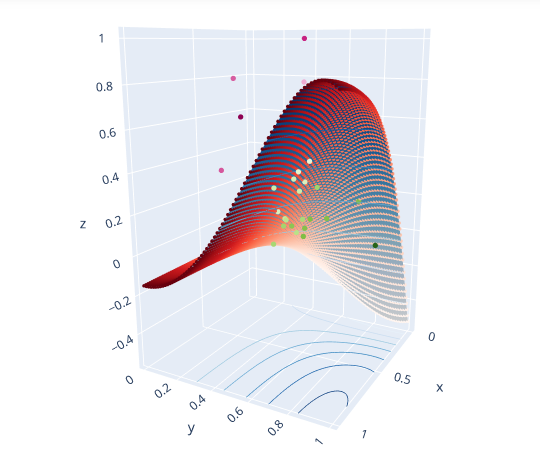

La fórmula de la función es la que se describe a continuación:
$$z=\sin(3\phi(x)(x-1-0.6\phi(x))^2+\frac{\pi}{2})\cos(3\phi(y)(y+0.3-0.5\phi(y))^2-\frac{\pi}{2})-0.15$$
donde:

$\phi(x)$ es un término de corrección que se define de la siguiente forma:

$$\phi(x) = \frac{0 - \min(x)}{\max(x)-\min(x)}$$

$x$ es la esperanza de los rendimientos

$y$ es la asimetría de los rendimientos

$z$ es la volatilidad esperada de los rendimientos

se considerará entonces el exceso de reducción de volatilidad como el criterio para escoger las acciones dentro del grupo de acciones entendida como la diferencia entre la volatilidad esperada por la función de expectativas anteriormente descrita y la volatilidad calculada en base a los rendimientos.

$$U = z - \bar{z}$$

donde:
$z$ es la función anteriormente descrita
$\bar{z}$ es la volatilidad de los rendimientos

La función de expectativa de volatilidad tiene algunas características a considerar
- Es cóncava por la disminución de la utilidad conforme se llega al extremo
- El punto máximo es menor a 1 porque se tienen preferencias por otros activos sobre los que tuvieran la posición máxima en todas las variables
- La función no es simétrica respecto al plano x=y por lo que se tienen una mayor volatilidad esperada respecto a una de las variables sobre la otra


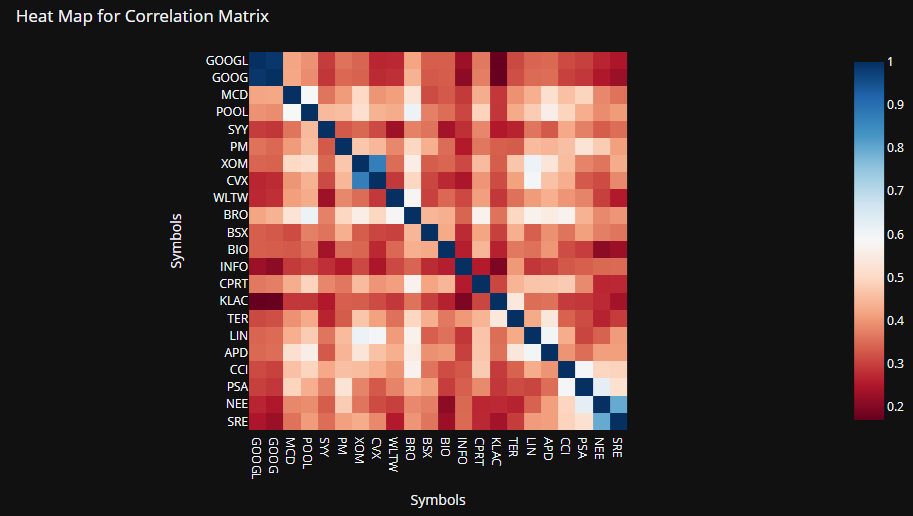

## 2. Selección de portafolios

Una vez elegidos los activos y/o ETFs:

1. Usando los precios históricos de dichos activos hasta el 2015-12-31 (la fecha inicial es un parámetro que ustedes deberán elegir), diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2016. Para esto, deberán suponer un coeficiente de aversión al riesgo.

2. Usando los precios históricos de dichos activos hasta el 2016-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2017.

3. Usando los precios históricos de dichos activos hasta el 2017-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2018.

4. Usando los precios históricos de dichos activos hasta el 2018-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2019.

5. Usando los precios históricos de dichos activos hasta el 2019-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2020.

6. Usando los precios históricos de dichos activos hasta el 2020-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2021.

In [17]:
acciones = ['GOOGL','GOOG','MCD','AMZN','PM','SYY','XOM','OXY','WLTW','NDAQ','HUM','BIO','EFX','NOC',
            'NVDA','GPN','VMC','AVY','PSA','CCI','NI','ATO']
ETF = ['ASHR','ASHS','EIRL','DXJ','CNXT']

In [7]:
closes = get_adj_closes(ETF + acciones, "01-01-2015",'31-12-2015')
rf_2015 = 0.0062/252

In [8]:
rend = closes.pct_change().dropna()
Eind_2015 = rend.mean()
Sigma_2015 = rend.cov()

In [9]:
n_port = 800000
n_act = 27
W = np.random.dirichlet(alpha = np.ones(n_act), size=n_port)
er = W.dot(Eind_2015)
s2 =((W.dot(Sigma_2015)*W).sum(axis = 1))**0.5

In [10]:
s = port_efi(Eind_2015, rf_2015, Sigma_2015, 15)
w = s.iloc[:-1,0]/100
emv = w.dot(Eind_2015)
semv =(w.T.dot(Sigma_2015).dot(w))**0.5

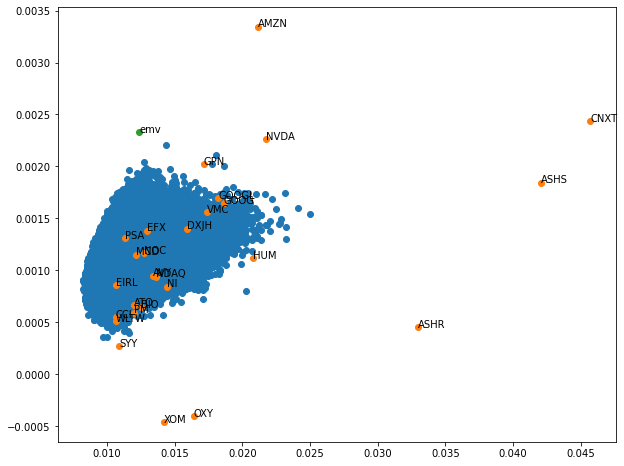

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(s2,er);
plt.scatter(rend.std(),Eind_2015)
[plt.annotate(rend.columns.to_numpy()[i], (rend.std()[i],Eind_2015[i])) for i in range(27)]
plt.scatter(semv,emv)
plt.annotate('emv',(semv,emv));

In [18]:
rend = closes.pct_change().dropna()
Eind_2015 = rend.mean()
Sigma_2015 = rend.cov()
rf_2015 = 0.0062/252

In [19]:
port_efi(Eind_2015, rf_2015, Sigma_2015, 15)

,Weights (%)
Symbols,
ASHR,0.00
ASHS,0.00
EIRL,0.00
DXJH,0.00
CNXT,0.00
GOOGL,0.00
GOOG,0.00
MCD,0.00
AMZN,36.68


In [47]:
closes_2016 = get_adj_closes(ETF + acciones, "01-01-2016",'31-12-2016')
rf_2016 = 0.0062/252

rend_2016 = closes_2016.pct_change().dropna()
Eind_2016 = rend_2016.mean()
Sigma_2016 = rend_2016.cov()

port_efi(Eind_2016, rf_2016, Sigma_2016, 100)

,Weights (%)
Symbols,
ASHR,0.00
ASHS,0.00
EIRL,0.00
DXJH,0.00
CNXT,0.00
GOOGL,0.00
GOOG,0.00
MCD,0.00
AMZN,0.00


In [48]:
closes_2017 = get_adj_closes(ETF + acciones, "01-01-2017",'31-12-2017')
rf_2017 = 0.0062/252

rend_2017 = closes_2017.pct_change().dropna()
Eind_2017 = rend_2017.mean()
Sigma_2017 = rend_2017.cov()

port_efi(Eind_2017, rf_2017, Sigma_2017, 100)

,Weights (%)
Symbols,
ASHR,11.05
ASHS,0.00
EIRL,8.04
DXJH,0.00
CNXT,0.00
GOOGL,0.00
GOOG,0.00
MCD,16.49
AMZN,3.42


In [49]:
closes_2018 = get_adj_closes(ETF + acciones, "01-01-2018",'31-12-2018')
rf_2018 = 0.0062/252

rend_2018 = closes_2018.pct_change().dropna()
Eind_2018 = rend_2018.mean()
Sigma_2018 = rend_2018.cov()

port_efi(Eind_2018, rf_2018, Sigma_2018, 100)

,Weights (%)
Symbols,
ASHR,0.00
ASHS,0.00
EIRL,0.00
DXJH,0.00
CNXT,0.00
GOOGL,0.00
GOOG,0.00
MCD,0.00
AMZN,1.74


In [50]:
closes_2019 = get_adj_closes(ETF + acciones, "01-01-2019",'31-12-2019')
rf_2019 = 0.0062/252

rend_2019 = closes_2019.pct_change().dropna()
Eind_2019 = rend_2019.mean()
Sigma_2019 = rend_2019.cov()

port_efi(Eind_2019, rf_2019, Sigma_2019, 100)

,Weights (%)
Symbols,
ASHR,0.00
ASHS,0.00
EIRL,1.87
DXJH,0.00
CNXT,1.27
GOOGL,0.00
GOOG,0.00
MCD,0.00
AMZN,0.00


In [51]:
closes_2020 = get_adj_closes(ETF + acciones, "01-01-2020",'31-12-2020')
rf_2020 = 0.0062/252

rend_2020 = closes_2020.pct_change().dropna()
Eind_2020 = rend_2020.mean()
Sigma_2020 = rend_2020.cov()

port_efi(Eind_2020, rf_2020, Sigma_2020, 100)

,Weights (%)
Symbols,
ASHR,0.00
ASHS,0.00
EIRL,0.00
DXJH,0.00
CNXT,2.07
GOOGL,0.00
GOOG,0.00
MCD,0.00
AMZN,1.94


## 3. Evaluación del rendimiento

Usando los portafolios que encontraron en el punto anterior, deberán encontrar:

1. El rendimiento del portafolio 1 durante el 2016.

2. El rendimiento del portafolio 2 durante el 2017.

3. El rendimiento del portafolio 3 durante el 2018.

4. El rendimiento del portafolio 4 durante el 2019.

5. El rendimiento del portafolio 5 durante el 2020.

6. El rendimiento del portafolio 6 durante lo que va del 2021.

6. El rendimiento total durante  el periodo de tenencia.

7. El rendimiento promedio anual durante el periodo de tenencia.

9. Si hubieran invertido 10.000 USD en estos portafolios a lo largo del tiempo y nunca hubieran retirado ni adicionado nada más, ¿Cuánto dinero tendrían invertido en este momento?

In [39]:
r15 = closes.iloc[[0, -1]]
r16 = closes.iloc[[0, -1]]
r17 = closes.iloc[[0, -1]]
r18 = closes.iloc[[0, -1]]
r19 = closes.iloc[[0, -1]]
r20 = closes.iloc[[0, -1]]

In [45]:
p15 = pd.DataFrame((r15.iloc[-1] / r15.iloc[0] - 1) * 100)
p15

,0
Symbols,
ASHR,-2.247956
ASHS,27.342098
EIRL,22.174855
DXJH,37.698412
CNXT,42.394042
GOOGL,46.919087
GOOG,44.997898
MCD,31.044435
AMZN,119.074951


In [ ]:
p16 = pd.DataFrame((r16.iloc[-1] / r16.iloc[0] - 1) * 100)
p17 = pd.DataFrame((r17.iloc[-1] / r17.iloc[0] - 1) * 100)
p18 = pd.DataFrame((r18.iloc[-1] / r18.iloc[0] - 1) * 100)
p19 = pd.DataFrame((r19.iloc[-1] / r19.iloc[0] - 1) * 100)
p20 = pd.DataFrame((r20.iloc[-1] / r20.iloc[0] - 1) * 100)

## 4. Adicional

Todo lo anterior es lo mínimo necesario del proyecto. Sin embargo, se considerarán ampliamente si ustedes miden el comportamiento de los portafolios con otras métricas que se les ocurran.

Además, se considerará ampliamente también si tienen en cuenta los precios reales de los activos en el momento de la compra, y como modifica esto las ponderaciones que encontraron para sus portafolios, considerando que no pueden comprar fracciones de activos y/o ETFs.

## 5. Presentación

Todo lo anterior lo deben realizar en un notebook de jupyter considerando que de ahí mismo realizarán la presentación del proyecto.

hola mundo

In [ ]:
1+1

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>